# Importing Dataset

In [1]:
import pandas as pd

df = pd.read_csv("../../datasets/latestdataset - Copy.csv")

C:\Users\kisha\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# EDA

In [2]:
df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),rain (mm),precipitation (mm),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³)
0,2015-01-01T00:00,20.2,96,6.6,0.3,0.3,22.2,0.226
1,2015-01-01T01:00,20.2,95,9.3,0.3,0.3,22.0,0.229
2,2015-01-01T02:00,20.3,96,10.5,0.4,0.4,22.0,0.233
3,2015-01-01T03:00,21.1,93,8.7,0.1,0.1,22.4,0.234
4,2015-01-01T04:00,22.5,86,8.2,0.1,0.1,23.3,0.235


In [3]:
df.drop(columns=["rain (mm)", "precipitation (mm)", "soil_moisture_0_to_7cm (m³/m³)"], inplace=True)

In [7]:
df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_temperature_0_to_7cm (°C)
0,2015-01-01T00:00,20.2,96,6.6,22.2
1,2015-01-01T01:00,20.2,95,9.3,22.0
2,2015-01-01T02:00,20.3,96,10.5,22.0
3,2015-01-01T03:00,21.1,93,8.7,22.4
4,2015-01-01T04:00,22.5,86,8.2,23.3


In [17]:
df.isnull().sum()

time                              0
temperature_2m (°C)               0
relative_humidity_2m (%)          0
wind_speed_10m (km/h)             0
soil_temperature_0_to_7cm (°C)    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87696 entries, 0 to 87695
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   time                            87696 non-null  object 
 1   temperature_2m (°C)             87696 non-null  float64
 2   relative_humidity_2m (%)        87696 non-null  int64  
 3   wind_speed_10m (km/h)           87696 non-null  float64
 4   soil_temperature_0_to_7cm (°C)  87696 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.3+ MB


In [19]:
df.describe()

,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_temperature_0_to_7cm (°C)
count,87696.000000,87696.000000,87696.000000,87696.000000
mean,24.882402,67.734994,10.200202,26.810767
std,4.207888,21.981105,5.067857,4.173180
min,12.600000,6.000000,0.000000,15.600000
25%,21.800000,53.000000,6.500000,23.800000
50%,24.200000,71.000000,9.400000,26.000000
75%,27.700000,87.000000,13.000000,29.000000
max,40.600000,100.000000,38.300000,44.900000


In [4]:
# Parse datetime
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

In [21]:
df.head()

,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_temperature_0_to_7cm (°C)
time,,,,
2015-01-01 00:00:00,20.2,96,6.6,22.2
2015-01-01 01:00:00,20.2,95,9.3,22.0
2015-01-01 02:00:00,20.3,96,10.5,22.0
2015-01-01 03:00:00,21.1,93,8.7,22.4
2015-01-01 04:00:00,22.5,86,8.2,23.3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87696 entries, 2015-01-01 00:00:00 to 2025-01-01 23:00:00
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   temperature_2m (°C)             87696 non-null  float64
 1   relative_humidity_2m (%)        87696 non-null  int64  
 2   wind_speed_10m (km/h)           87696 non-null  float64
 3   soil_temperature_0_to_7cm (°C)  87696 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.3 MB


In [5]:
# Convert all to float for scaling
df = df.astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87696 entries, 2015-01-01 00:00:00 to 2025-01-01 23:00:00
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   temperature_2m (°C)             87696 non-null  float64
 1   relative_humidity_2m (%)        87696 non-null  float64
 2   wind_speed_10m (km/h)           87696 non-null  float64
 3   soil_temperature_0_to_7cm (°C)  87696 non-null  float64
dtypes: float64(4)
memory usage: 3.3 MB


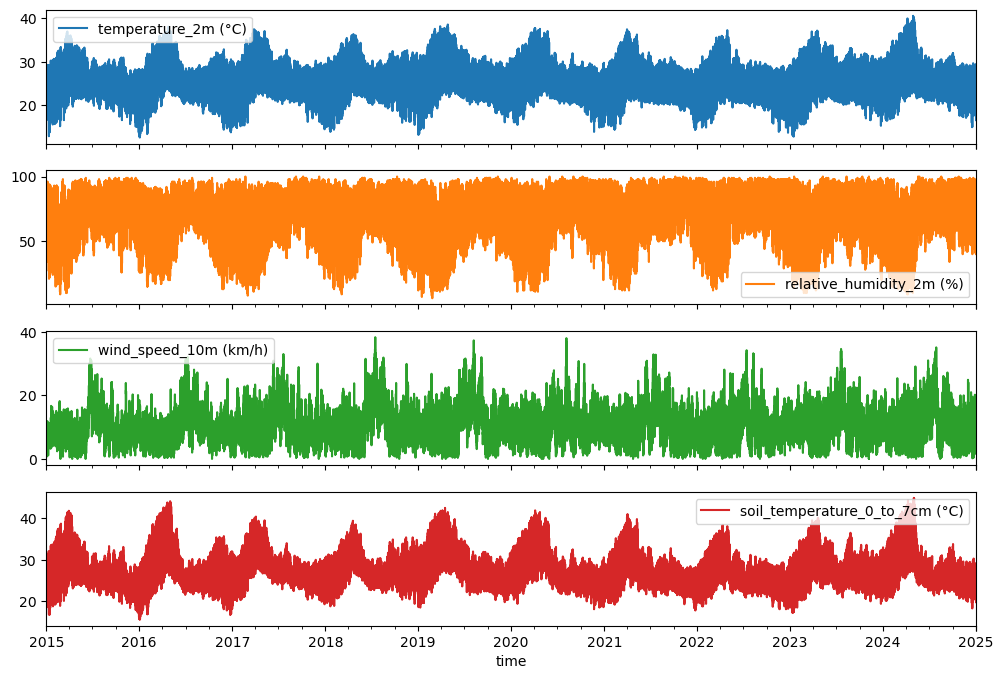

In [25]:
import matplotlib.pyplot as plt

df[['temperature_2m (°C)', 'relative_humidity_2m (%)', 'wind_speed_10m (km/h)',
    'soil_temperature_0_to_7cm (°C)']].plot(subplots=True, figsize=(12,8))
plt.show()

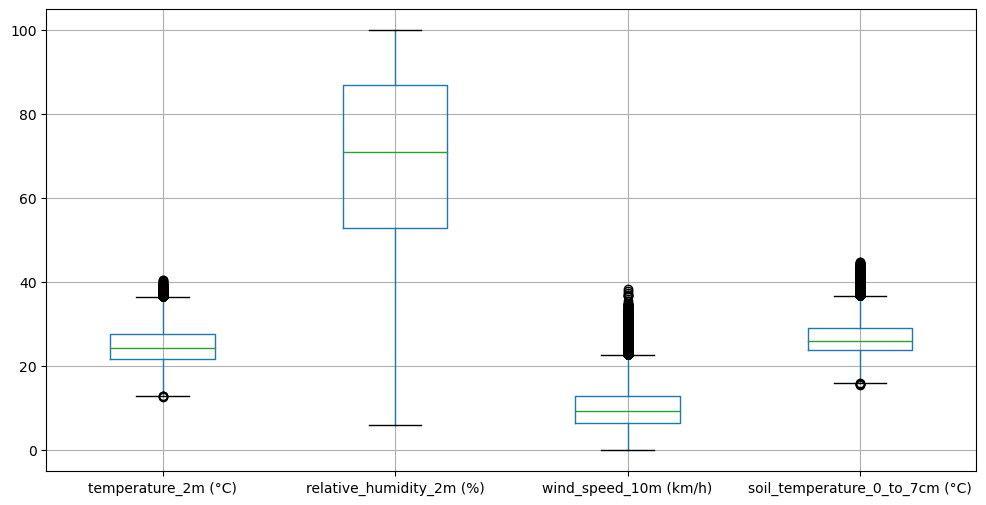

In [14]:
df.boxplot(figsize=(12,6))
plt.show()

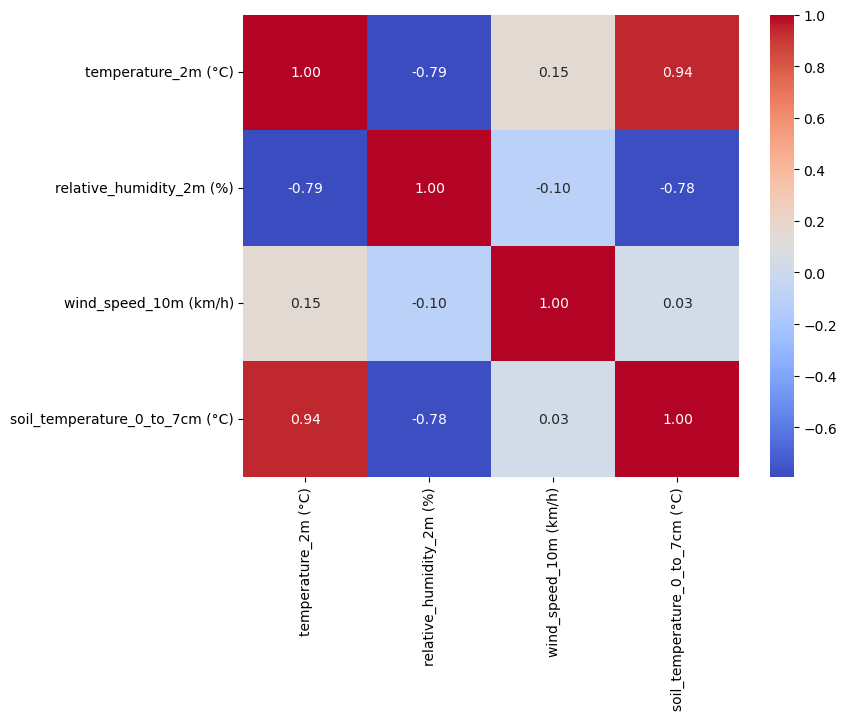

In [15]:
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [16]:
df.corr()

,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_temperature_0_to_7cm (°C)
temperature_2m (°C),1.000000,-0.791077,0.150130,0.938183
relative_humidity_2m (%),-0.791077,1.000000,-0.104702,-0.784057
wind_speed_10m (km/h),0.150130,-0.104702,1.000000,0.031311
soil_temperature_0_to_7cm (°C),0.938183,-0.784057,0.031311,1.000000



==== Analyzing temperature_2m (°C) ====


C:\Users\kisha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


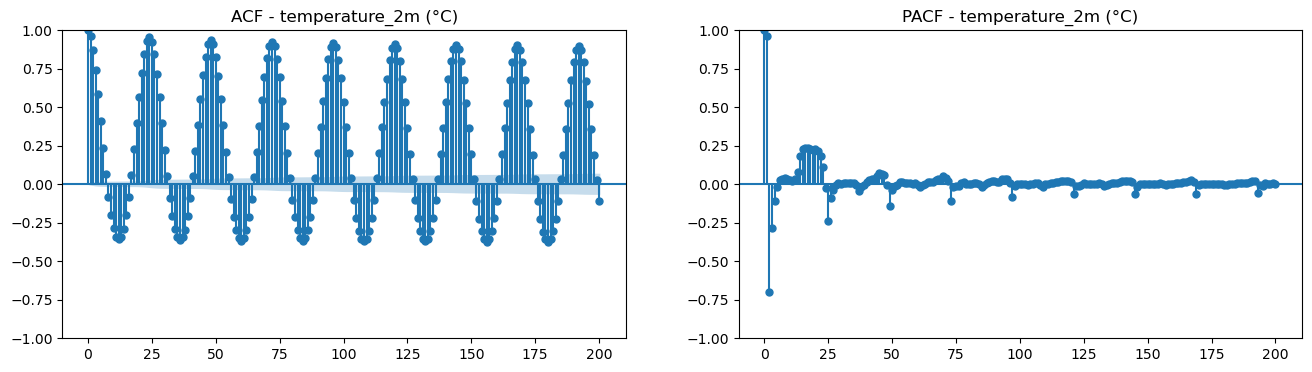


==== Analyzing relative_humidity_2m (%) ====


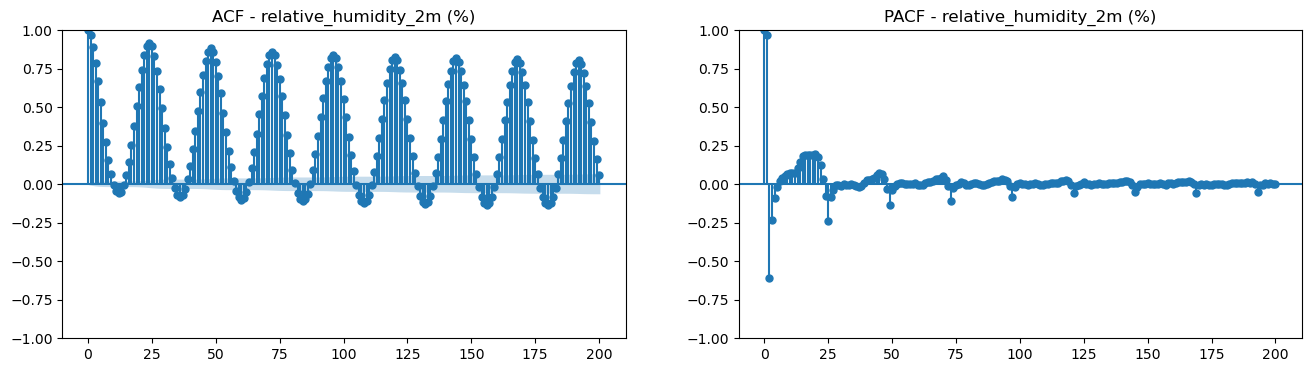


==== Analyzing wind_speed_10m (km/h) ====


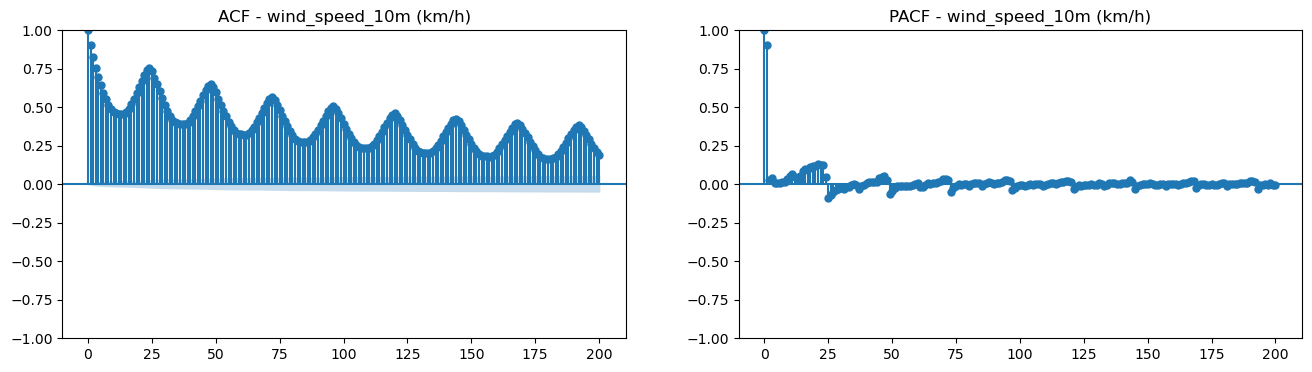


==== Analyzing soil_temperature_0_to_7cm (°C) ====


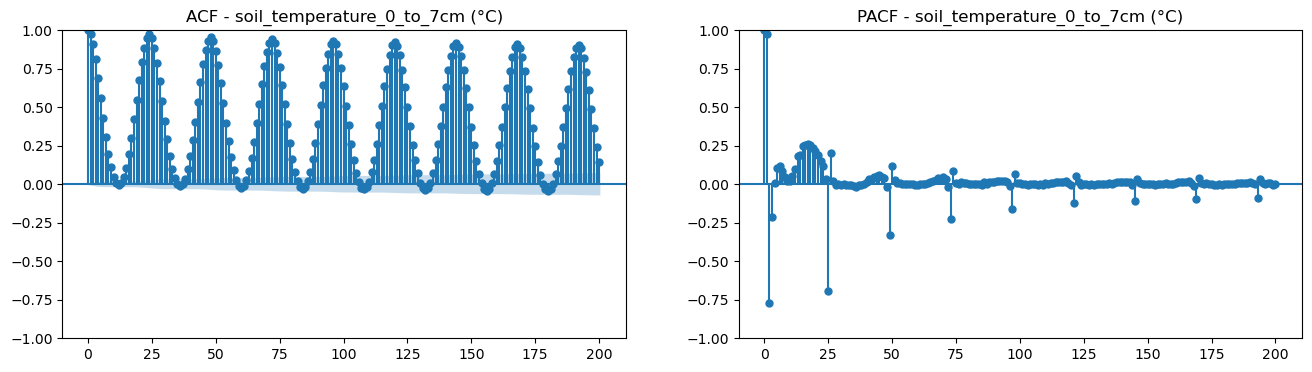

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df has DateTimeIndex and your 4 columns
features = ['temperature_2m (°C)',
            'relative_humidity_2m (%)',
            'wind_speed_10m (km/h)',
            'soil_temperature_0_to_7cm (°C)']

# Loop over features
for col in features:
    print(f"\n==== Analyzing {col} ====")
    
    # Plot ACF and PACF
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    
    plot_acf(df[col], lags=200, ax=axes[0])   # check up to 200 lags (≈8 days for hourly data)
    axes[0].set_title(f"ACF - {col}")
    
    plot_pacf(df[col], lags=200, ax=axes[1])
    axes[1].set_title(f"PACF - {col}")
    
    plt.show()

# Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df.values)

df_scaled = pd.DataFrame(scaled, index=df.index, columns=df.columns)

In [7]:
import joblib

joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved as 'scaler.pkl'")

✅ Scaler saved as 'scaler.pkl'


In [27]:
df.head()

,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_temperature_0_to_7cm (°C)
time,,,,
2015-01-01 00:00:00,20.2,96.0,6.6,22.2
2015-01-01 01:00:00,20.2,95.0,9.3,22.0
2015-01-01 02:00:00,20.3,96.0,10.5,22.0
2015-01-01 03:00:00,21.1,93.0,8.7,22.4
2015-01-01 04:00:00,22.5,86.0,8.2,23.3


# 1) Create sequences (multi-step, multi-feature)

In [7]:
import numpy as np

def create_sequences(data, look_back=72, horizon=6):
    """
    data: numpy array shape (T, n_features)
    returns:
      X: (samples, look_back, n_features)
      y: (samples, horizon, n_features)
    """
    X, y = [], []
    T = len(data)
    for i in range(T - look_back - horizon + 1):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back : i+look_back+horizon])
    X = np.array(X)
    y = np.array(y)
    return X, y

# Example
look_back = 72   # 3 days (hourly)
horizon = 6      # next 6 hours
data = df_scaled.values  # scaled numpy array
X, y = create_sequences(data, look_back, horizon)
print("X", X.shape, "y", y.shape)  # (samples, look_back, n_feat), (samples, horizon, n_feat)

X (87619, 72, 4) y (87619, 6, 4)


# 2) Train / Val / Test split (chronological)

In [8]:
n = len(X)
train_idx = int(0.70 * n)
val_idx   = int(0.85 * n)

X_train, y_train = X[:train_idx], y[:train_idx]
X_val, y_val     = X[train_idx:val_idx], y[train_idx:val_idx]
X_test, y_test   = X[val_idx:], y[val_idx:]

print(X_train.shape, X_val.shape, X_test.shape)

(61333, 72, 4) (13143, 72, 4) (13143, 72, 4)


# 3) Build a Keras LSTM multi-step multi-output model

In [9]:
n_features = X.shape[2]

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# flatten y for training
y_train_flat = y_train.reshape((y_train.shape[0], -1))
y_val_flat   = y_val.reshape((y_val.shape[0], -1))
y_test_flat  = y_test.reshape((y_test.shape[0], -1))

inp = Input(shape=(look_back, n_features))
x = LSTM(128, return_sequences=False)(inp)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
out = Dense(horizon * n_features)(x)

model = Model(inp, out)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_lstm.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

history = model.fit(
    X_train, y_train_flat,
    validation_data=(X_val, y_val_flat),
    epochs=100,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 72, 4)]           0         
                                                                 
 lstm (LSTM)                 (None, 128)               68096     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 24)                1560      
                                                                 
Total params: 77,912
Trainable params: 77,912
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
959/959 [==============================] - 80

Epoch 48/100
959/959 [==============================] - 85s 89ms/step - loss: 0.0021 - mae: 0.0316 - val_loss: 0.0023 - val_mae: 0.0322 - lr: 7.8125e-06
Epoch 49/100
959/959 [==============================] - 83s 86ms/step - loss: 0.0021 - mae: 0.0316 - val_loss: 0.0023 - val_mae: 0.0322 - lr: 7.8125e-06
Epoch 50/100
959/959 [==============================] - 80s 83ms/step - loss: 0.0021 - mae: 0.0316 - val_loss: 0.0023 - val_mae: 0.0322 - lr: 3.9063e-06
Epoch 51/100
959/959 [==============================] - 77s 80ms/step - loss: 0.0021 - mae: 0.0316 - val_loss: 0.0023 - val_mae: 0.0322 - lr: 3.9063e-06
Epoch 52/100
959/959 [==============================] - 81s 85ms/step - loss: 0.0021 - mae: 0.0316 - val_loss: 0.0023 - val_mae: 0.0322 - lr: 3.9063e-06
Epoch 53/100
959/959 [==============================] - 80s 83ms/step - loss: 0.0021 - mae: 0.0316 - val_loss: 0.0023 - val_mae: 0.0322 - lr: 3.9063e-06
Epoch 54/100
959/959 [==============================] - 82s 85ms/step - loss: 0.00

# 4) Predict + inverse-scale correctly

In [10]:
from tensorflow.keras.models import load_model

# load saved model
model = load_model('best_lstm.h5')

# predict flatten
y_pred_flat = model.predict(X_test)  # shape (samples, horizon * n_features)
y_pred = y_pred_flat.reshape((-1, horizon, n_features))   # reshape

# helper to invert scaler
from sklearn.preprocessing import MinMaxScaler
# assume 'scaler' is the MinMaxScaler you used earlier (fit on training df)
def inverse_scale_preds(y_scaled, scaler):
    # y_scaled: (samples, horizon, n_features)
    samples, H, F = y_scaled.shape
    y_inv = np.zeros_like(y_scaled)
    for h in range(H):
        y_inv[:, h, :] = scaler.inverse_transform(y_scaled[:, h, :])
    return y_inv

y_test_inv = inverse_scale_preds(y_test, scaler)
y_pred_inv = inverse_scale_preds(y_pred, scaler)

411/411 [==============================] - 11s 24ms/step


# 5) Evaluation — per-feature, per-horizon

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def eval_multi(y_true, y_pred, feature_names):
    samples, H, F = y_true.shape
    results = {}
    for f in range(F):
        results[feature_names[f]] = {}
        for h in range(H):
            yt = y_true[:, h, f]
            yp = y_pred[:, h, f]
            mae = mean_absolute_error(yt, yp)
            rmse = np.sqrt(mean_squared_error(yt, yp))
            results[feature_names[f]][f"step_{h+1}"] = {"MAE": mae, "RMSE": rmse}
    return results

feature_names = df_scaled.columns.tolist()
results = eval_multi(y_test_inv, y_pred_inv, feature_names)
import pprint; pprint.pprint(results)

{'relative_humidity_2m (%)': {'step_1': {'MAE': 2.3436462714647965,
                                         'RMSE': 3.516148989962705},
                              'step_2': {'MAE': 3.2546007283644744,
                                         'RMSE': 4.625048053492043},
                              'step_3': {'MAE': 3.826041136504145,
                                         'RMSE': 5.3241481832876065},
                              'step_4': {'MAE': 4.175041012030019,
                                         'RMSE': 5.77311149378895},
                              'step_5': {'MAE': 4.44648078775366,
                                         'RMSE': 6.118036454276099},
                              'step_6': {'MAE': 4.6475275089449966,
                                         'RMSE': 6.365689370745793}},
 'soil_temperature_0_to_7cm (°C)': {'step_1': {'MAE': 0.30423907204722106,
                                               'RMSE': 0.4208157467150955},
                              

# 6) Compare Against a Baseline

In [12]:
y_naive = np.tile(X_test[:, -1, :].reshape((-1,1,n_features)), (1,horizon,1))
y_naive_inv = inverse_scale_preds(y_naive, scaler)

baseline_results = eval_multi(y_test_inv, y_naive_inv, feature_names)
pprint.pprint(baseline_results)

{'relative_humidity_2m (%)': {'step_1': {'MAE': 4.16647645134292,
                                         'RMSE': 5.699919441572569},
                              'step_2': {'MAE': 7.62649319029141,
                                         'RMSE': 9.936843092397494},
                              'step_3': {'MAE': 10.881990413147683,
                                         'RMSE': 13.835398275938925},
                              'step_4': {'MAE': 13.956554820056304,
                                         'RMSE': 17.376656333881137},
                              'step_5': {'MAE': 16.768469907935785,
                                         'RMSE': 20.543449703609188},
                              'step_6': {'MAE': 19.273149204899948,
                                         'RMSE': 23.300352230400225}},
 'soil_temperature_0_to_7cm (°C)': {'step_1': {'MAE': 0.7361333028988816,
                                               'RMSE': 0.9309387113408686},
                           

# Visual Comparison (Baseline vs LSTM vs Actual)

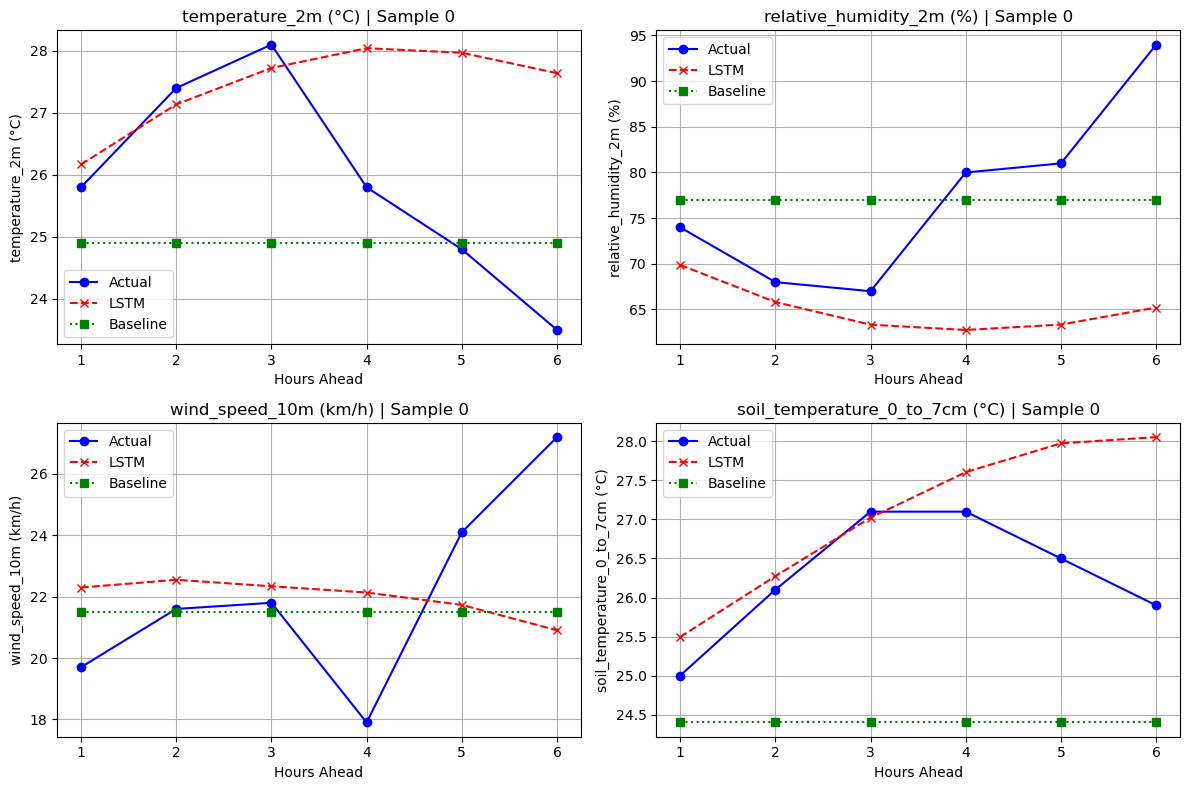

In [15]:
import matplotlib.pyplot as plt
def plot_forecasts_grid(y_true, y_pred_lstm, y_pred_baseline, feature_names, sample_idx=0):
    """
    Plots Actual vs LSTM vs Baseline predictions for each feature,
    arranging features in a grid (2 per row) for easier comparison.
    """
    horizon = y_true.shape[1]
    n_features = len(feature_names)
    
    # Determine grid layout: 2 columns
    n_cols = 2
    n_rows = (n_features + 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
    axes = axes.flatten()
    
    x = range(1, horizon+1)
    
    for f, name in enumerate(feature_names):
        ax = axes[f]
        ax.plot(x, y_true[sample_idx, :, f], marker='o', linestyle='-', color='blue', label='Actual')
        ax.plot(x, y_pred_lstm[sample_idx, :, f], marker='x', linestyle='--', color='red', label='LSTM')
        ax.plot(x, y_pred_baseline[sample_idx, :, f], marker='s', linestyle=':', color='green', label='Baseline')
        ax.set_title(f'{name} | Sample {sample_idx}')
        ax.set_xlabel('Hours Ahead')
        ax.set_ylabel(name)
        ax.grid(True)
        ax.legend()
    
    # Hide empty subplots if features are odd
    for i in range(n_features, n_rows*n_cols):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_forecasts_grid(y_test_inv, y_pred_inv, y_naive_inv, feature_names, sample_idx=0)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_multi(y_true, y_pred, feature_names):
    samples, H, F = y_true.shape
    results = {}
    for f in range(F):
        results[feature_names[f]] = {}
        for h in range(H):
            yt = y_true[:, h, f]
            yp = y_pred[:, h, f]
            mae = mean_absolute_error(yt, yp)
            rmse = np.sqrt(mean_squared_error(yt, yp))
            r2 = r2_score(yt, yp)
            mape = np.mean(np.abs((yt - yp) / yt)) * 100
            results[feature_names[f]][f"step_{h+1}"] = {"MAE": mae, "RMSE": rmse, "MAPE": mape, "R2": r2}
    return results

feature_names = df_scaled.columns.tolist()
results = eval_multi(y_test_inv, y_pred_inv, feature_names)
import pprint; pprint.pprint(results)

{'relative_humidity_2m (%)': {'step_1': {'MAE': 2.3436462714647965,
                                         'MAPE': 3.9727488029369074,
                                         'R2': 0.9734873096963766,
                                         'RMSE': 3.516148989962705},
                              'step_2': {'MAE': 3.2546007283644744,
                                         'MAPE': 5.4601043081171445,
                                         'R2': 0.9541296677245029,
                                         'RMSE': 4.625048053492043},
                              'step_3': {'MAE': 3.826041136504145,
                                         'MAPE': 6.453758000172176,
                                         'R2': 0.9392198949502956,
                                         'RMSE': 5.3241481832876065},
                              'step_4': {'MAE': 4.175041012030019,
                                         'MAPE': 7.095802847388388,
                                         'R2': 

C:\Users\kisha\AppData\Local\Temp\ipykernel_4968\3500543907.py:14: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((yt - yp) / yt)) * 100
C:\Users\kisha\AppData\Local\Temp\ipykernel_4968\3500543907.py:14: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((yt - yp) / yt)) * 100
C:\Users\kisha\AppData\Local\Temp\ipykernel_4968\3500543907.py:14: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((yt - yp) / yt)) * 100
C:\Users\kisha\AppData\Local\Temp\ipykernel_4968\3500543907.py:14: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((yt - yp) / yt)) * 100
C:\Users\kisha\AppData\Local\Temp\ipykernel_4968\3500543907.py:14: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((yt - yp) / yt)) * 100
C:\Users\kisha\AppData\Local\Temp\ipykernel_4968\3500543907.py:14: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((yt - yp) / yt)) * 10

In [17]:
import json

# Save the nested dictionary as JSON
with open("lstm_metrics.json", "w") as f:
    json.dump(results, f, indent=4)

print("Metrics saved as JSON!")

Metrics saved as JSON!


In [25]:
import pandas as pd

# Flatten results into a DataFrame
rows = []
for feat, steps in results.items():
    for step, metrics in steps.items():
        row = {"feature": feat, "step": step}
        row.update(metrics)
        rows.append(row)

results_df = pd.DataFrame(rows)

# Average per feature
avg_per_feature = results_df.groupby("feature")[["MAE", "RMSE", "MAPE", "R2"]].mean()

print("\n=== Average Metrics Per Feature Across Steps ===")
print(avg_per_feature)

# (Optional) also add std to see stability
std_per_feature = results_df.groupby("feature")[["MAE", "RMSE", "MAPE", "R2"]].std()

print("\n=== Std Dev of Metrics Per Feature Across Steps ===")
print(std_per_feature)


=== Average Metrics Per Feature Across Steps ===
                                     MAE      RMSE      MAPE        R2
feature                                                               
relative_humidity_2m (%)        3.782223  5.287030  6.420038  0.938047
soil_temperature_0_to_7cm (°C)  0.449808  0.608901  1.680404  0.978644
temperature_2m (°C)             0.617853  0.859432  2.450454  0.956505
wind_speed_10m (km/h)           1.938897  2.552831       inf  0.767928

=== Std Dev of Metrics Per Feature Across Steps ===
                                     MAE      RMSE      MAPE        R2
feature                                                               
relative_humidity_2m (%)        0.859547  1.064516  1.488278  0.022632
soil_temperature_0_to_7cm (°C)  0.098160  0.128711  0.359344  0.008486
temperature_2m (°C)             0.114201  0.139233  0.454058  0.013097
wind_speed_10m (km/h)           0.253502  0.269480       NaN  0.046264
